# Statistical Methods for Financial Time Series using Python Project

#### Authors: Raphael Amzallag, Ojaswi Gupta, Meher Lejri

First, we import all the libraries we are going to use in this project.

In [29]:
import numpy as np #for POWERFUL N-DIMENSIONAL ARRAYS AND NUMERICAL COMPUTING TOOLS
import pandas as pd #use open source data analysis and manipulation tool
import matplotlib.pyplot as plt #Plot and visualize data in graphical form
import seaborn as sns #provides a high-level interface for drawing attractive and informative statistical graphics.
sns.set()
import plotly.express as px #makes interactive, publication-quality graphs
import pandas_datareader.data as web #Up-to-date remote data access for pandas
import plotly
import datetime #date_manipulation
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
from matplotlib import style
import datetime as dt
import plotly.graph_objects as go
from plotly.subplots import make_subplots #seates a figure and a grid of subplots with a single call,
import yfinance as yf #financial metrics 
import requests
from bs4 import BeautifulSoup # syntactic analysis of HTML and XML documents
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt #classes and functions for the estimation of many different statistical models
from statsmodels.tsa.api import adfuller, kpss, acf #for stationarity and autocorrelation
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model #volatily
from scipy import stats #uses numpy and mathematical calculations
import yahoo_fin.stock_info as si

# Obtaining and Cleaning our Data



Then, for our project, we will use one Index (S&P500), three Equities (Apple, JP Morgan, Ford) and two cryptocurriences (Bitcoin, Ethereum). In the following code cells, we will download the tickers using yahoo finance, organise the table, and change all missing values to 0. 

In [2]:
tickers_list = '^GSPC AAPL JPM F BTC-USD ETH-USD' #creating the list 
tickers_to_names = {'^GSPC': 'SP500',  #association of each equity to its binomial
                    'AAPL': 'Apple',
                    'JPM': 'JP Morgan',
                    'F': 'Ford Motors',
                    'BTC-USD': 'Bitcoin',
                    'ETH-USD': 'Ethereum'}

In [3]:
data = yf.download(tickers=tickers_list,
                         start='2012-01-01', end='2022-01-01', interval='1d')

[*********************100%***********************]  6 of 6 completed


In [4]:
data.rename(columns=tickers_to_names, level=1, inplace=True) 
#putting the columns names and round up to two after the decimal point data.head().round(2)

In [5]:
data.isna().any() # boolean test for NA values 

Adj Close  Apple          True
           Bitcoin        True
           Ethereum       True
           Ford Motors    True
           JP Morgan      True
           SP500          True
Close      Apple          True
           Bitcoin        True
           Ethereum       True
           Ford Motors    True
           JP Morgan      True
           SP500          True
High       Apple          True
           Bitcoin        True
           Ethereum       True
           Ford Motors    True
           JP Morgan      True
           SP500          True
Low        Apple          True
           Bitcoin        True
           Ethereum       True
           Ford Motors    True
           JP Morgan      True
           SP500          True
Open       Apple          True
           Bitcoin        True
           Ethereum       True
           Ford Motors    True
           JP Morgan      True
           SP500          True
Volume     Apple          True
           Bitcoin        True
        

In [6]:
#data.fillna(0).round(2) #replacing the "Nan" with "0" 

<AxesSubplot:xlabel='Date'>

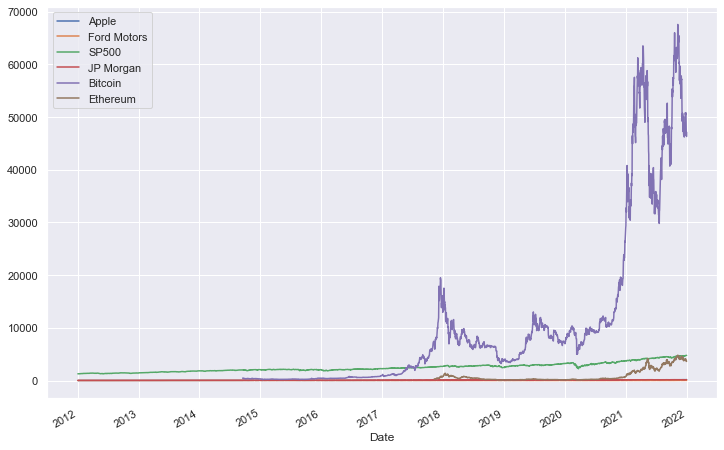

In [7]:
prices = data.loc[:,'Adj Close'].copy() #select all the lignes and only the column"Adj Close"
prices.head()
prices.plot(y=["Apple","Ford Motors", "SP500","JP Morgan","Bitcoin","Ethereum"],figsize=(12,8)) #Overlay the 6 charts in a plot

After cleaning our data, we want to normalise the prices so that we can better interpret  the previous plot. After normalising the price in the following cell, we plot our chart. 

In [8]:
prices = data.loc[:,'Adj Close'].copy()
normalized_prices=(prices-prices.mean())/prices.std() #normalizing the dataset values by calculating the mean and the standard deviation
normalized_prices.head() 

,Apple,Bitcoin,Ethereum,Ford Motors,JP Morgan,SP500
Date,,,,,,
2012-01-03,-0.881189,NaN,NaN,-1.064215,-1.364735,-1.447191
2012-01-04,-0.879470,NaN,NaN,-1.015039,-1.360220,-1.446900
2012-01-05,-0.875900,NaN,NaN,-0.931149,-1.345240,-1.442347
2012-01-06,-0.872501,NaN,NaN,-0.896438,-1.351807,-1.446282
2012-01-09,-0.873023,NaN,NaN,-0.870403,-1.353038,-1.442783


<AxesSubplot:xlabel='Date'>

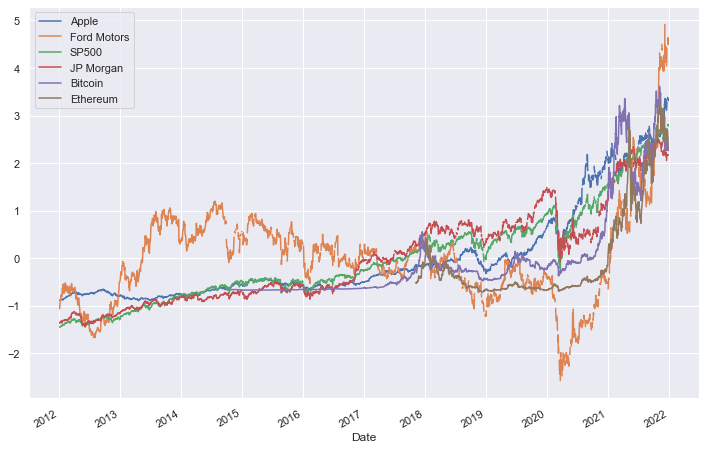

In [9]:
normalized_prices.plot(y=["Apple","Ford Motors", "SP500","JP Morgan","Bitcoin","Ethereum"],figsize=(12,8))
#representing the  values of the new "prices" dataset

We then want to calculate our daily return for each asset. Once we have our returns, we plot our daily return graphs. 

In [10]:
ret_data = prices/prices.shift(1)-1 #measuring the daily return
ret_data

,Apple,Bitcoin,Ethereum,Ford Motors,JP Morgan,SP500
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,NaN,NaN,0.015274,0.006335,0.000188
2012-01-05,0.011102,NaN,NaN,0.025664,0.020887,0.002944
2012-01-06,0.010454,NaN,NaN,0.010354,-0.008969,-0.002537
2012-01-09,-0.001586,NaN,NaN,0.007686,-0.001697,0.002262
...,...,...,...,...,...,...
2021-12-27,NaN,-0.003328,-0.007322,NaN,NaN,NaN
2021-12-28,-0.005767,-0.060259,-0.058613,-0.001923,0.003035,-0.001010
2021-12-29,0.000502,-0.024042,-0.045348,-0.009634,-0.000504,0.001402


In [11]:
ret_data.isna().any() #boolean test for NA values in the daily returns 
#ret_data=ret_data.fillna(0) #replacing the "NA" values with "0"
ret_data

,Apple,Bitcoin,Ethereum,Ford Motors,JP Morgan,SP500
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,NaN,NaN,0.015274,0.006335,0.000188
2012-01-05,0.011102,NaN,NaN,0.025664,0.020887,0.002944
2012-01-06,0.010454,NaN,NaN,0.010354,-0.008969,-0.002537
2012-01-09,-0.001586,NaN,NaN,0.007686,-0.001697,0.002262
...,...,...,...,...,...,...
2021-12-27,NaN,-0.003328,-0.007322,NaN,NaN,NaN
2021-12-28,-0.005767,-0.060259,-0.058613,-0.001923,0.003035,-0.001010
2021-12-29,0.000502,-0.024042,-0.045348,-0.009634,-0.000504,0.001402


<AxesSubplot:xlabel='Date'>

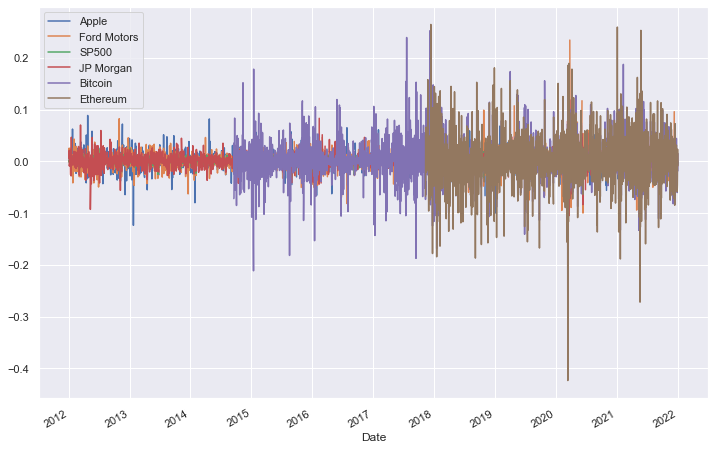

In [12]:
ret_data.plot(y=["Apple","Ford Motors", "SP500","JP Morgan","Bitcoin","Ethereum"],figsize=(12,8))
#plotting the 6 overlayed charts 

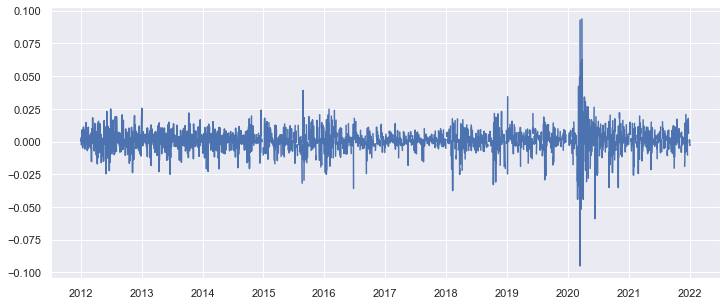

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(ret_data.index, ret_data['SP500']); 
#plotting the Index

For better clarity, we decided to plot the daily return for each of our six assets in 6 seperate graphs.

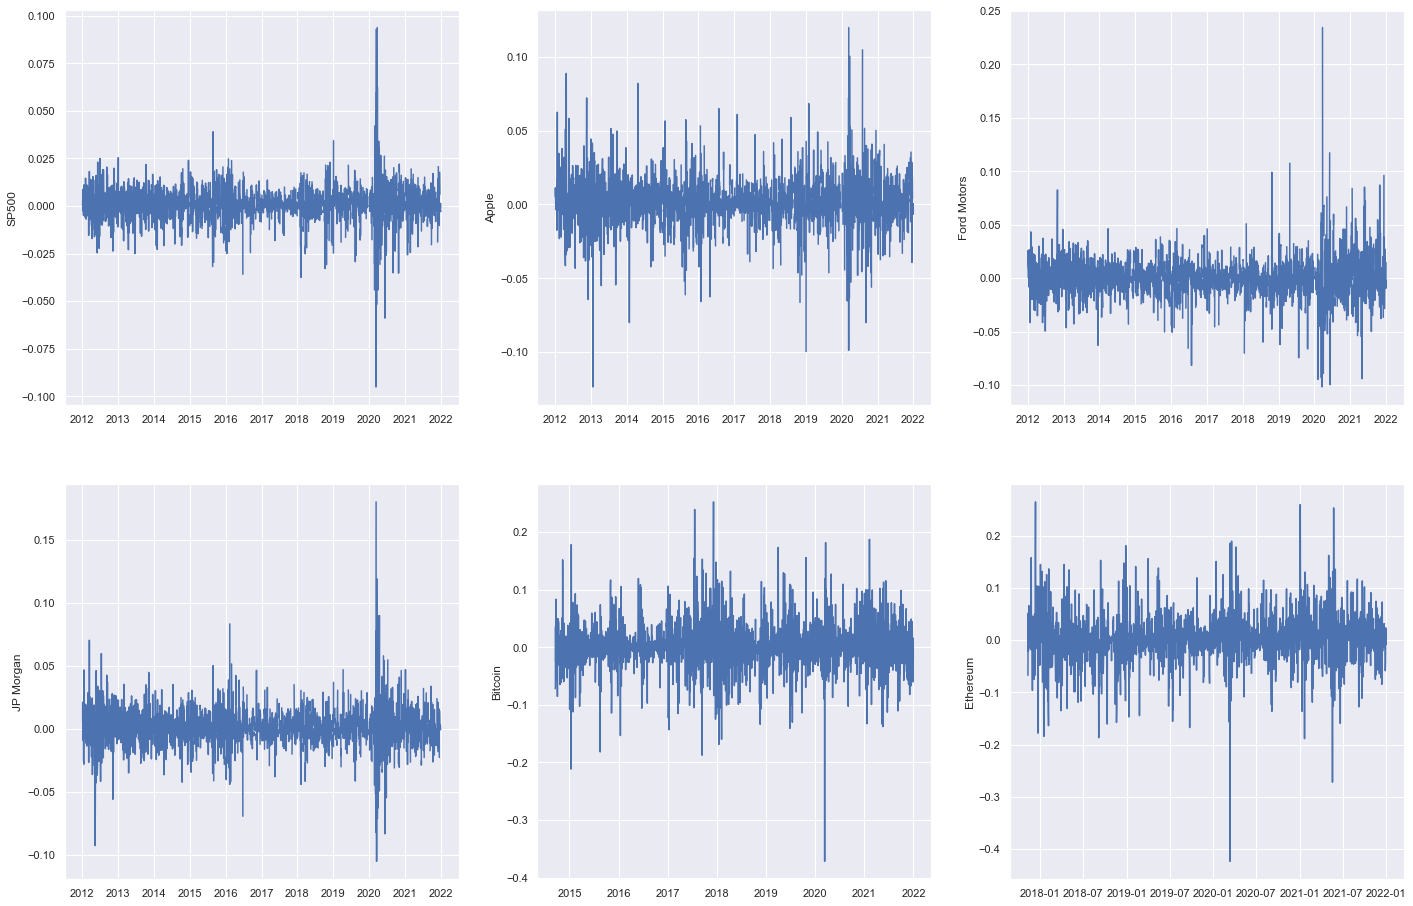

In [14]:
fig, ax = plt.subplots(2,3, figsize=(24, 16))   #configuring the size of each plot

ax[0,0].plot( ret_data['SP500']) #plotting the specific column
ax[0,0].set_ylabel("SP500") #labeling the y-axis of the same specific colmun
ax[0,1].plot( ret_data['Apple'])
ax[0,1].set_ylabel("Apple")
ax[0,2].plot( ret_data['Ford Motors'])
ax[0,2].set_ylabel("Ford Motors")
ax[1,0].plot( ret_data['JP Morgan'])
ax[1,0].set_ylabel("JP Morgan")
ax[1,1].plot( ret_data['Bitcoin'])
ax[1,1].set_ylabel("Bitcoin")
ax[1,2].plot( ret_data['Ethereum'])
ax[1,2].set_ylabel("Ethereum")

plt.show() #display each plot


We then create the absolute value of daily returns, which is a good indicator of volatility for each individual assets. Then, we plot the six charts and add some colours for aesthetics. 

In [15]:
ret_abs= np.abs(ret_data) #measuring the absolute value of the daily returns

ret_abs

,Apple,Bitcoin,Ethereum,Ford Motors,JP Morgan,SP500
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005374,NaN,NaN,0.015274,0.006335,0.000188
2012-01-05,0.011102,NaN,NaN,0.025664,0.020887,0.002944
2012-01-06,0.010454,NaN,NaN,0.010354,0.008969,0.002537
2012-01-09,0.001586,NaN,NaN,0.007686,0.001697,0.002262
...,...,...,...,...,...,...
2021-12-27,NaN,0.003328,0.007322,NaN,NaN,NaN
2021-12-28,0.005767,0.060259,0.058613,0.001923,0.003035,0.001010
2021-12-29,0.000502,0.024042,0.045348,0.009634,0.000504,0.001402


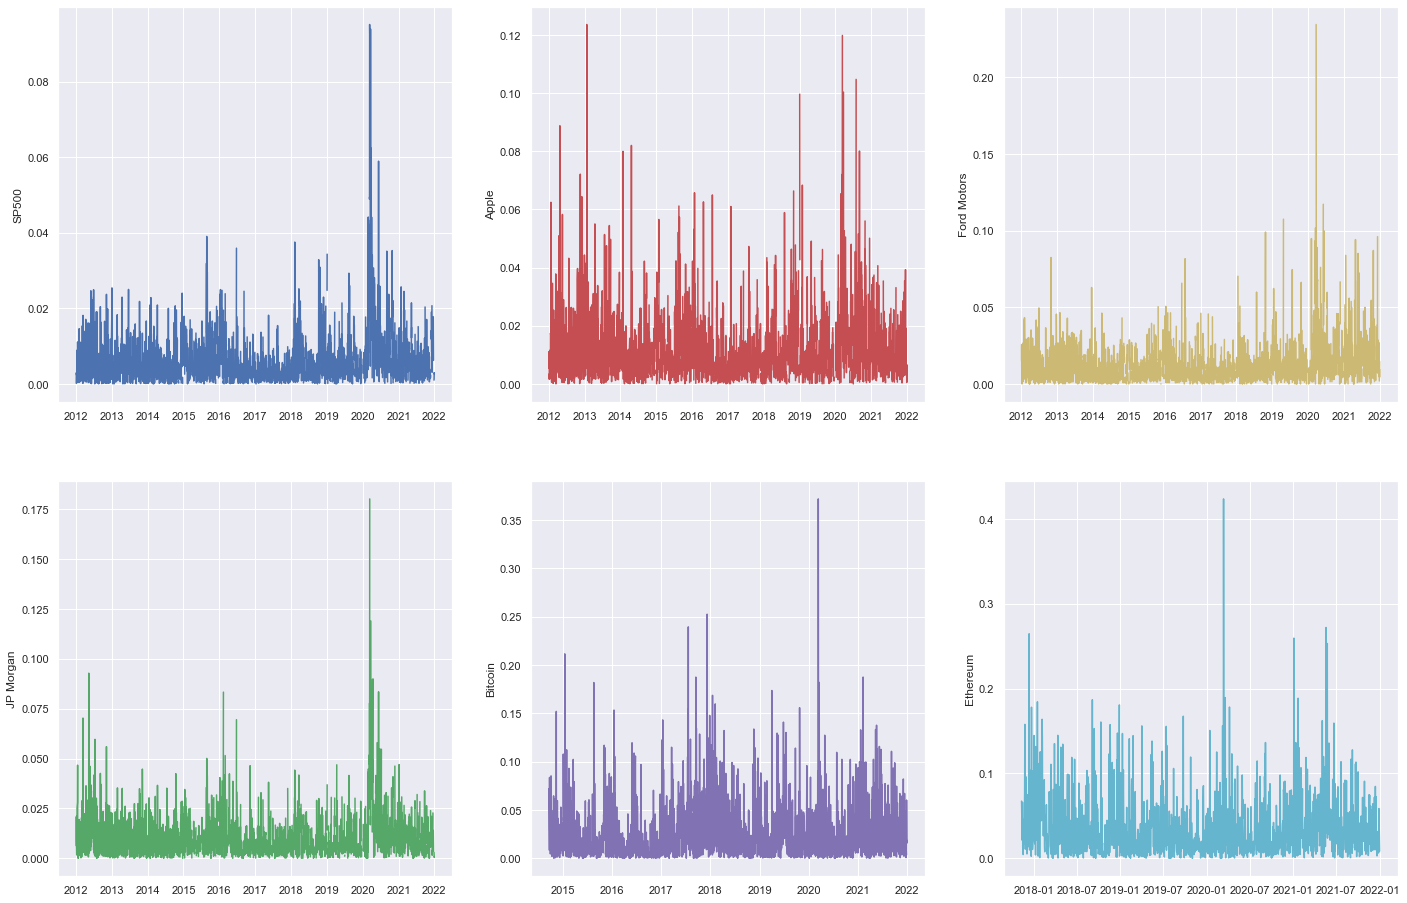

In [16]:
fig, ax = plt.subplots(2,3, figsize=(24, 16)) #config nrows, ncols and figsize

ax[0,0].plot( ret_abs['SP500']) #plotting the specific column
ax[0,0].set_ylabel("SP500")#labeling the y-axis of the same specific colmun
ax[0,0].set_ylabel("SP500") 
ax[0,1].plot( ret_abs['Apple'],color="r")
ax[0,1].set_ylabel("Apple")
ax[0,2].plot( ret_abs['Ford Motors'],color="y")
ax[0,2].set_ylabel("Ford Motors")
ax[1,0].plot( ret_abs['JP Morgan'],color="g")
ax[1,0].set_ylabel("JP Morgan")
ax[1,1].plot( ret_abs['Bitcoin'],color="m")
ax[1,1].set_ylabel("Bitcoin")
ax[1,2].plot( ret_abs['Ethereum'],color="c")
ax[1,2].set_ylabel("Ethereum")

plt.show()


We then create the log return and plot the six log return charts. 

In [17]:
log_ret = np.log(prices / prices.shift(1)) #measuring the log return and  shifting the index by the desired number of periods with an optional time frequency
log_ret.head() #display the log return

,Apple,Bitcoin,Ethereum,Ford Motors,JP Morgan,SP500
Date,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.005360,NaN,NaN,0.015159,0.006315,0.000188
2012-01-05,0.011041,NaN,NaN,0.025340,0.020672,0.002939
2012-01-06,0.010400,NaN,NaN,0.010300,-0.009009,-0.002540
2012-01-09,-0.001588,NaN,NaN,0.007656,-0.001698,0.002259


In [18]:
Ticker = input("Select the ticker you wish to anaylse from the following list - Apple,Bitcoin,Ethereum,Ford Motors,JP Morgan,SP500: ")

Select the ticker you wish to anaylse from the following list - Apple,Bitcoin,Ethereum,Ford Motors,JP Morgan,SP500: Apple


# Exploratory Data Analysis

We then plot the distribution of the returns for the asset that was previously selected. Our comments will be related the the ticker Ford, but you are free to use the underlying you wish.

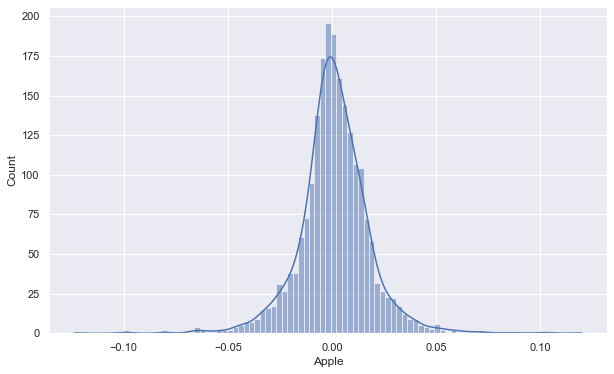

In [19]:
fig, ax = plt.subplots(figsize=(10,6))  #config of the histoplot size
sns.histplot(data=ret_data, x=Ticker, kde=True); #drawing the histoplot

In [20]:
ret_data[['SP500', 'JP Morgan','Apple','Bitcoin','Ethereum','Ford Motors']].stack().reset_index()
ret_lf = ret_data[['SP500', 'JP Morgan','Apple','Bitcoin','Ethereum','Ford Motors']].stack().reset_index().rename(columns={'level_1': 'Ticker', 0: 'Return'}).copy()
ret_lf.head(10)  
# stack is a linear data structure that stores items in a fifo or lifo
#organizing and setting the dataset parameters 
#display the dataset

,Date,Ticker,Return
0,2012-01-04,SP500,0.000188
1,2012-01-04,JP Morgan,0.006335
2,2012-01-04,Apple,0.005374
3,2012-01-04,Ford Motors,0.015274
4,2012-01-05,SP500,0.002944
5,2012-01-05,JP Morgan,0.020887
6,2012-01-05,Apple,0.011102
7,2012-01-05,Ford Motors,0.025664
8,2012-01-06,SP500,-0.002537
9,2012-01-06,JP Morgan,-0.008969


Below is a chart where all 6 assets are overlayed on top of each other. 

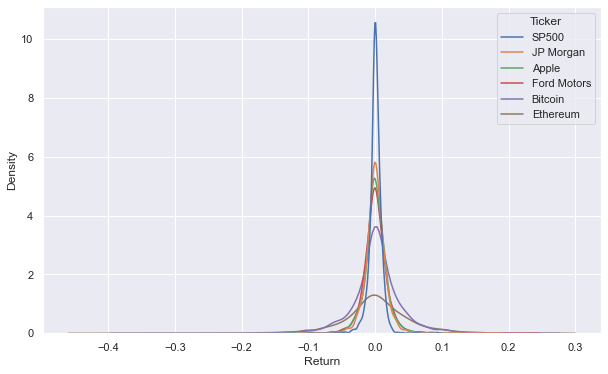

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(data=ret_lf, x='Return', hue='Ticker'); 
#drawing the Kernel Density Estimatecwith of each ticker with seaborn's function : kdplot

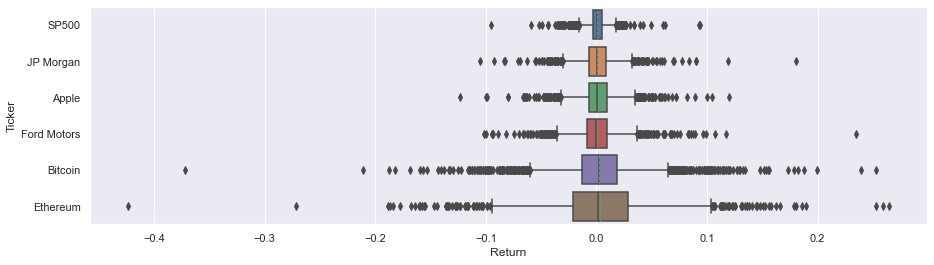

In [22]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.boxplot(data=ret_lf, x='Return', y='Ticker', showmeans=True, meanline=True); #drawing the boxplot 

# Tests for stationarity

The Null hypothesis of the Augmented Dickey-Fuller test is that there is a unit root. Here are our hypothesis: 

H0 : there is a unit root, there is no stationarity

H1 : There is no unit root, the data is stationary

In [23]:
def print_adf_test(x, regression='c'): #creating a test-function of stationarity
    res = smt.adfuller(x, regression=regression)
    print(f'test statistic: {res[0]:.5f}')
    print(f'p-value: {res[1]:.5f}')
    return res

In [24]:
x=ret_data[Ticker].dropna().copy() #dropping the NA values
x = x - x.mean() 
x *= 100
x.head()

Date
2012-01-04    0.436180
2012-01-05    1.008974
2012-01-06    0.944174
2012-01-09   -0.259866
2012-01-10    0.256853
Name: Apple, dtype: float64

In [25]:
def print_adf_test(x): #function that test stationarity
    regressions = {'constant only': 'c',
                   'constant and trend': 'ct',
                   'no constant, no trend': 'n'}
    df = pd.DataFrame(data=np.zeros((len(regressions),2)),
                      index=regressions,
                      columns=['test statistic', 'p-value'])
    for reg in regressions:
        res = adfuller(x, regression=regressions[reg])
        df.loc[reg, 'test statistic'] = res[0]
        df.loc[reg, 'p-value'] = res[1]
    display(df.round(4))
    return df

In [26]:
res = print_adf_test(x) 

#The p-value is below 5 %, hence we reject H0. The data is stationnary hence we can continue our analysis. 

,test statistic,p-value
constant only,-34.6865,0.0
constant and trend,-34.6923,0.0
"no constant, no trend",-34.6947,0.0


We plot the returns and squared returns, highlighting the returns that are greater than 3% in absolute value.
Observe the clustering of such values, indicative of ARCH effect. 

# REWORD

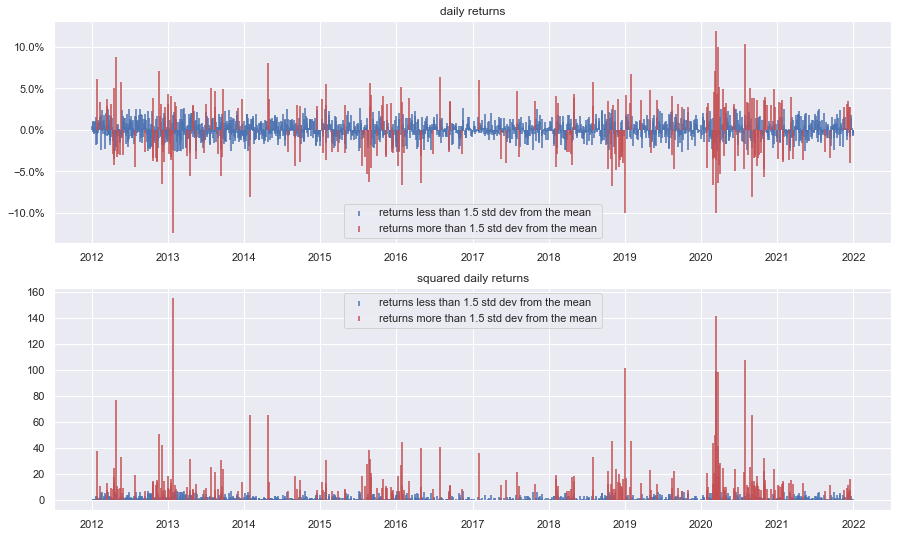

In [27]:
coeff = 1.5
mask = np.abs(x) > coeff * x.std() 

fig, ax = plt.subplots(2, figsize=(15, 9))

ax[0].stem(x[~mask].index, x[~mask].values, linefmt='b-', markerfmt=' ', basefmt=' ', label=f"returns less than {coeff} std dev from the mean")
ax[0].stem(x[mask].index, x[mask].values, linefmt='r-', markerfmt=' ', basefmt=' ', label=f"returns more than {coeff} std dev from the mean")
ax[0].set_title('daily returns')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=100))

ax[1].stem(x[~mask].index, x[~mask].values ** 2, linefmt='b-', markerfmt=' ', basefmt=' ', label=f"returns less than {coeff} std dev from the mean")
ax[1].stem(x[mask].index, x[mask].values ** 2, linefmt='r-', markerfmt=' ', basefmt=' ', label=f"returns more than {coeff} std dev from the mean")
ax[1].set_title('squared daily returns')

ax[0].legend()
ax[1].legend();

# Autocorrelation and Partial Autocorrelation

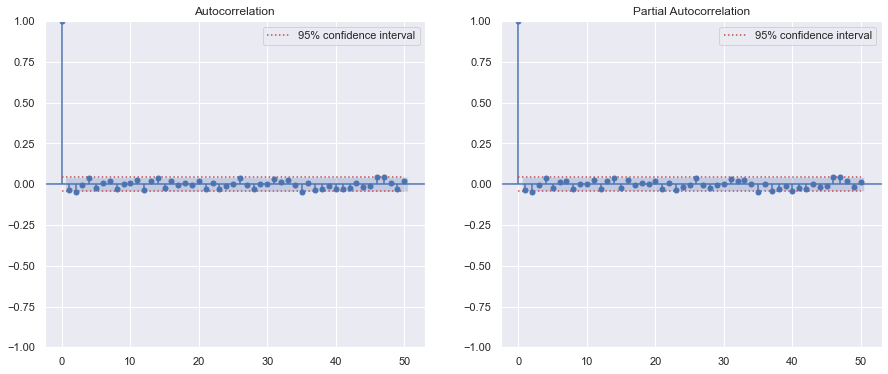

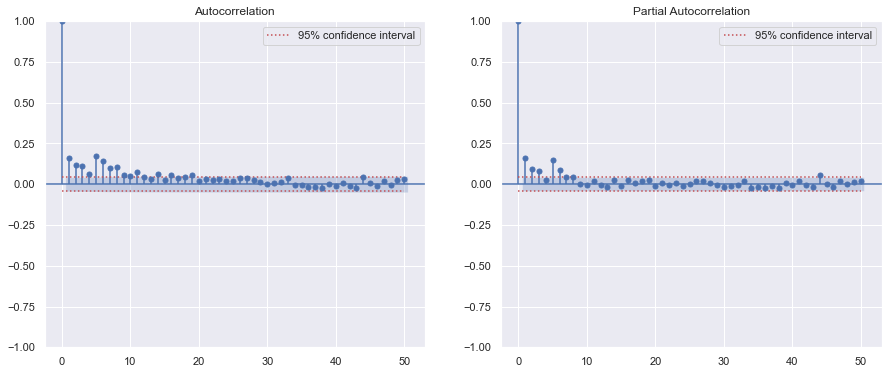

In [31]:
def acf_pacf(x, lags=50): #function to test ACF Method
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    plot_acf(x, lags=lags, ax=ax[0])
    plot_pacf(x, lags=lags, ax=ax[1], method='ywm')
    
    # add the 95% confidence interval using variance = 1/N
    stderr = stats.norm.ppf(.975) / np.sqrt(len(x))
    ax[0].hlines([stderr, -stderr], 0, lags, colors='r', linestyles='dotted', label='95% confidence interval')
    ax[1].hlines([stderr, -stderr], 0, lags, colors='r', linestyles='dotted', label='95% confidence interval')
    
    ax[0].legend()
    ax[1].legend()
    
    return fig

fig = acf_pacf(x)
fig = acf_pacf(x ** 2) 

## Ljung-Box Q test for autocorrelation

The Null hypothesis of the Ljung-Box Q-test for a lag m is H0 : ρ(1) = · · · = ρ(m) = 0 vs. the Alternative
Hypothesis that at least one of these autocorrelation is different from zero.

The table below gives the p-values of the Ljung-Box test for different lags.


In [32]:
def print_acf(x, lags):
    val, qstat, pval = acf(x, fft=False, qstat=True, nlags=lags.max())
    df = pd.DataFrame(np.array([qstat[lags-1], 100 * pval[lags-1]]).T,
                      columns=['Q Statistic', 'p-value (%)'],
                      index=[f'up to lag {lag}' for lag in lags]).round(2)
    display(df)
    return df

In [34]:
lags = np.array([1, 2, 3, 5, 7, 8, 10, 20, 30]) #creating the array
res = print_acf(x, lags=lags)
res = print_acf(x**2, lags=lags)

,Q Statistic,p-value (%)
up to lag 1,2.22,13.59
up to lag 2,7.08,2.91
up to lag 3,7.08,6.93
up to lag 5,12.09,3.36
up to lag 7,12.97,7.28
up to lag 8,14.88,6.15
up to lag 10,14.99,13.24
up to lag 20,26.41,15.28
up to lag 30,35.74,21.66


,Q Statistic,p-value (%)
up to lag 1,54.70,0.0
up to lag 2,82.99,0.0
up to lag 3,110.00,0.0
up to lag 5,182.13,0.0
up to lag 7,245.02,0.0
up to lag 8,268.67,0.0
up to lag 10,281.35,0.0
up to lag 20,330.68,0.0
up to lag 30,346.00,0.0


It confirms that some autocorrelations are statistically significant. But the p-values of the first three lags are above the significance level of 5%. Let's apply to the squared returns.  

Here we clearly reject the Null Hypothesis.

# Engle’s Test for Autoregressive Conditional Heteroscedasticity

The Null Hypothesis is that there is no ARCH effect.

In [35]:
def print_engle_test(x):
    res = het_arch(x, nlags=min(10, len(x)//5))
    df = pd.DataFrame(data = np.array(res).reshape(2,2),
                      columns=['test statistic', 'p-value'],
                      index=['Lagrange Multiplier', 'F test'])
    print("Engle's ARCH Test")
    display(df.round(4))
    return df

res = print_engle_test(x)

Engle's ARCH Test


,test statistic,p-value
Lagrange Multiplier,153.7919,0.0
F test,16.5029,0.0


# Fitting a GARCH(p,q) model


We create a function to estimate some GARCH models and store their AIC and BIC values in two DataFrame.
We then select the most appropriate model, which is the model that minimises the AIC and BIC value.

In [36]:
def select_garch(x, max_arch=2, max_garch=2, mean='Zero'):
    
    # create the row and columns indices for the DataFrame
    row_index = pd.Index(data=np.arange(max_arch)+1, name='ARCH Lags')
    col_index = pd.Index(data=np.arange(max_garch+1), name='GARCH Lags')
    
    # create the DataFrames with zeros everywhere
    aic = pd.DataFrame(data=np.zeros((max_arch, max_garch+1)),
                       index=row_index,
                       columns=col_index)
    bic = pd.DataFrame(data=np.zeros((max_arch, max_garch+1)),
                       index=row_index,
                       columns=col_index)
    
    # loop on ARCH lags and GARCH lags
    for i in range(max_arch):
        for j in range(max_garch+1):
            # estimate the model and save AIC and BIC
            model = arch_model(x, p=i+1, q=j, mean=mean)
            res = model.fit(update_freq=0, disp='off')
            aic.iloc[i, j] = res.aic
            bic.iloc[i, j] = res.bic
    
    # find the row and column index of the minimum value in the AIC DataFrame
    # and store the corresponding order of the GARCH model in a tuple
    r_min, c_min = np.unravel_index(np.argmin(aic), aic.shape)
    aic_min_order = (row_index[r_min], col_index[c_min])
    
    # same for BIC
    r_min, c_min = np.unravel_index(np.argmin(bic), bic.shape)
    bic_min_order = (row_index[r_min], col_index[c_min])
    
    # display the results
    display(aic.round(1))
    print(f'AIC selected order: {aic_min_order}')
    display(bic.round(1))
    print(f'BIC selected order: {bic_min_order}')
    
    # return the two DataFrame
    return aic, bic

In [37]:
aic, bic = select_garch(x, max_arch=5, max_garch=3, mean='Zero')

GARCH Lags,0,1,2,3
ARCH Lags,,,,
1,8276.7,8110.1,8112.0,8113.5
2,8207.9,8112.1,8110.3,8114.4
3,8168.1,8114.1,8111.9,8113.7
4,8169.1,8116.1,8113.9,8115.7
5,8140.4,8110.1,8114.6,8114.1


AIC selected order: (1, 1)


GARCH Lags,0,1,2,3
ARCH Lags,,,,
1,8288.0,8127.1,8134.6,8141.8
2,8224.9,8134.7,8138.6,8148.3
3,8190.8,8142.4,8145.8,8153.3
4,8197.4,8150.1,8153.5,8160.9
5,8174.3,8149.7,8159.9,8165.1


BIC selected order: (1, 1)


In [38]:
model = arch_model(x, p=1, q=1, mean='Zero') #config 
res_garch11 = model.fit(update_freq=0, disp='off') 
res_garch11.summary() #getting the resume of the  performance parameters 

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Apple   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4052.05
Distribution:                  Normal   AIC:                           8110.11
Method:            Maximum Likelihood   BIC:                           8127.08
                                        No. Observations:                 2118
Date:                Wed, May 25 2022   Df Residuals:                     2118
Time:                        08:50:43   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2348  8.192e-02      2.867  4.148e-03 [7.427e-02,  0.395]
alpha[1]       0.1201  3.318e-02      3.620  2.944e-04 [5.509e-02,  0.185]
beta[1]        0.8069  4.775e-02     16.899  4.586e-64   [  0.713,  0.901]
==========================================================================

Covariance estimator: robust
"""

In [39]:
model = arch_model(x, p=1, q=1, mean='Zero')
res_garch11 = model.fit(update_freq=0, disp='off') #testing the model with other parameters
res_garch11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Apple   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4052.05
Distribution:                  Normal   AIC:                           8110.11
Method:            Maximum Likelihood   BIC:                           8127.08
                                        No. Observations:                 2118
Date:                Wed, May 25 2022   Df Residuals:                     2118
Time:                        08:50:47   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.2348  8.192e-02      2.867  4.148e-03 [7.427e-02,  0.395]
alpha[1]       0.1201  3.318e-02      3.620  2.944e-04 [5.509e-02,  0.185]
beta[1]        0.8069  4.775e-02     16.899  4.586e-64   [  0.713,  0.901]
==========================================================================

Covariance estimator: robust
"""

##  Residuals analysis

We study the standardized residuals, that is  𝜀𝑡=𝑟𝑡/𝜎𝑡

To do so, we plot an histogram of the data with the KDE and the best fit by a Normal distribution
as well as a Normal Probability Plot.

In [40]:
def hist_probplot(data, bins='auto'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    sns.histplot(data=data, bins=bins, kde=True, stat='density', ax=ax[0], label="data") #config 
    xmin, xmax = ax[0].get_xlim()
    x = np.linspace(xmin, xmax, 200)
    y = stats.norm.pdf(x, loc=data.mean(), scale=data.std(ddof=0)) #normalization
    ax[0].plot(x, y, 'r', label="best Normal fit") 
    ax[0].legend()

    stats.probplot(data, plot=ax[1])
    
    return fig

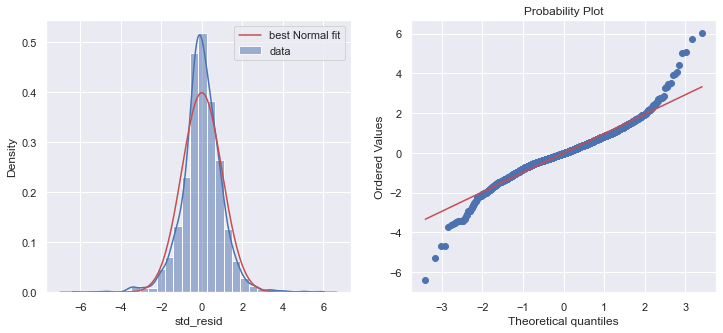

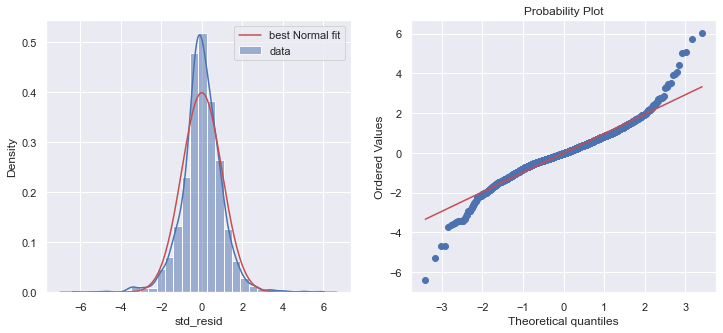

In [42]:
fig = hist_probplot(res_garch11.std_resid, bins=30)
fig = hist_probplot(res_garch11.std_resid, bins=30)

In [43]:
model = arch_model(x, p=1, q=1, mean='Zero', dist='t')
res_t = model.fit(update_freq=0, disp='off')
res_t.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Zero Mean - GARCH Model Results                           
====================================================================================
Dep. Variable:                        Apple   R-squared:                       0.000
Mean Model:                       Zero Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3906.81
Distribution:      Standardized Student's t   AIC:                           7821.61
Method:                  Maximum Likelihood   BIC:                           7844.25
                                              No. Observations:                 2118
Date:                      Wed, May 25 2022   Df Residuals:                     2118
Time:                              08:51:03   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1912  9.301e-02      2.055  3.986e-02 [8.858e-03,  0.373]
alpha[1]       0.1164  4.252e-02      2.739  6.166e-03 [3.311e-02,  0.200]
beta[1]        0.8338  6.204e-02     13.438  3.620e-41   [  0.712,  0.955]
                              Distribution                              
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
nu             3.8867      0.339     11.458  2.152e-30 [  3.222,  4.552]
========================================================================

Covariance estimator: robust
"""

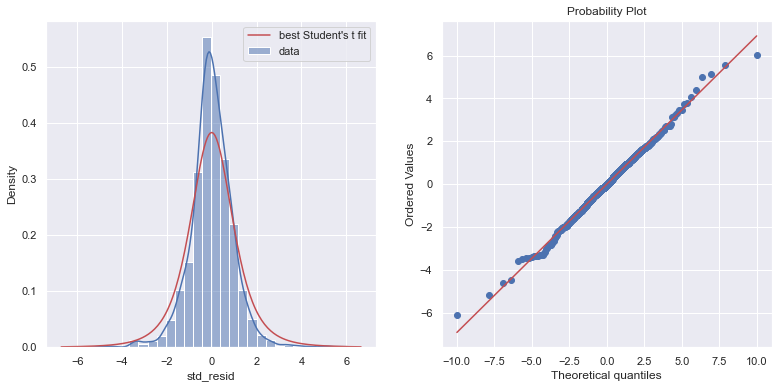

In [44]:
def hist_probplot_t(data, dof, bins='auto', lags=40):
    fig, ax = plt.subplots(1, 2, figsize=(13, 6))
    
    sns.histplot(data=data, bins=bins, kde=True, stat='density', ax=ax[0], label="data")
    xmin, xmax = ax[0].get_xlim()
    x = np.linspace(xmin, xmax, 200)
    y = stats.t.pdf(x, loc=data.mean(), scale=data.std(), df=dof)
    ax[0].plot(x, y, 'r', label="best Student's t fit")
    ax[0].legend()
    
    stats.probplot(data, plot=ax[1], dist='t', sparams=dof)
    
    return fig

dof = res_t.params['nu']
fig = hist_probplot_t(res_t.std_resid, dof=dof, bins=30)

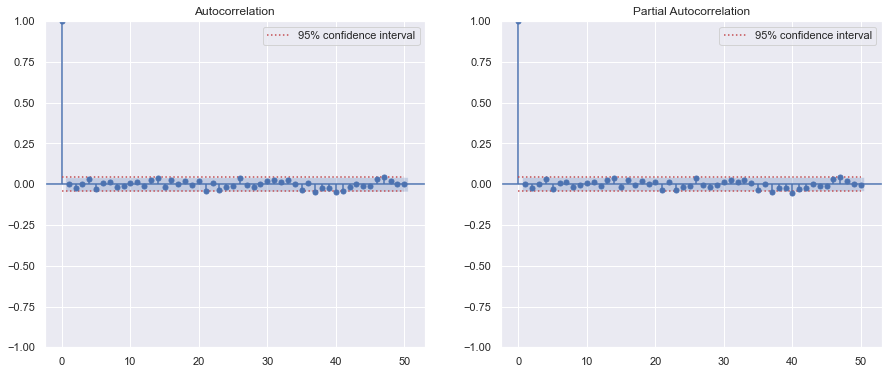

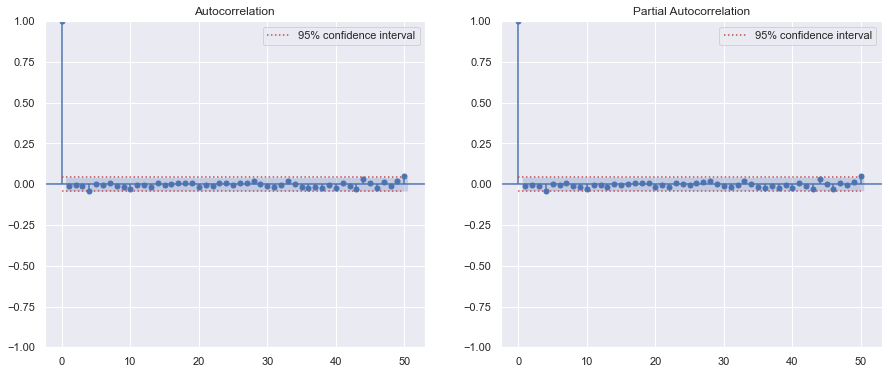

In [45]:
fig = acf_pacf(res_t.std_resid) #test of partail autororrelation and autocorrelation
fig = acf_pacf(res_t.std_resid ** 2)

In [46]:
res = print_engle_test(res_t.std_resid) #engle arch test

Engle's ARCH Test


,test statistic,p-value
Lagrange Multiplier,7.0181,0.7237
F test,0.7005,0.7248


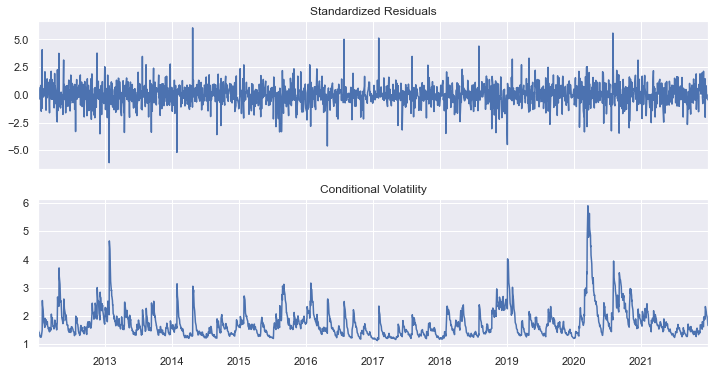

In [47]:
fig = res_t.plot()
fig.set_size_inches(12,6)

In [57]:
df = x.to_frame(name=Ticker).copy()
df['vol'] = res_t.conditional_volatility
df['upper'] = stats.t.ppf(0.975, df=res_t.params['nu']) * df['vol']
df['lower'] = -df['upper']
df['outlier'] = (df[Ticker] > df['upper']) | (df[Ticker] < df['lower'])
df.head()

,Apple,vol,upper,lower,outlier
Date,,,,,
2012-01-04,0.436180,1.494550,4.197690,-4.197690,False
2012-01-05,1.008974,1.440718,4.046494,-4.046494,False
2012-01-06,0.944174,1.428396,4.011885,-4.011885,False
2012-01-09,-0.259866,1.412834,3.968177,-3.968177,False
2012-01-10,0.256853,1.365025,3.833898,-3.833898,False


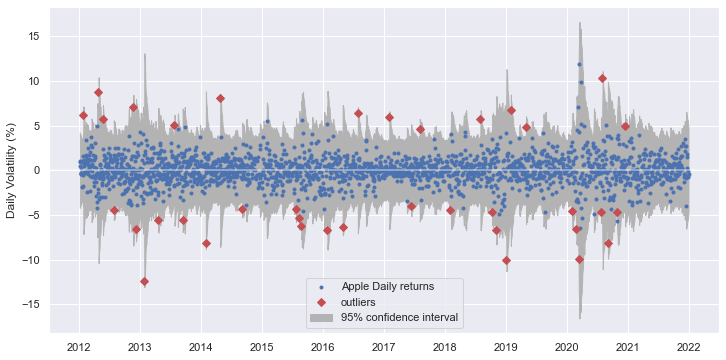

In [58]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df[Ticker][~df['outlier']], 'b.', label= Ticker+' Daily returns')
ax.plot(df[Ticker][df['outlier']], 'rD', label='outliers')
ax.fill_between(x.index, df['lower'], df['upper'], color='0.7', label='95% confidence interval')
ax.axhline(0, c='w', alpha=0.5)

ax.set_ylabel('Daily Volatility (%)')
ax.legend(loc='lower center');

In [59]:
res_t.params

omega       0.191160
alpha[1]    0.116444
beta[1]     0.833761
nu          3.886674
Name: params, dtype: float64

In [60]:
uncond_var = res_t.params['omega'] / (1 - (res_t.params['alpha[1]'] + res_t.params['beta[1]']))
print(f'Unconditional volatility of GARCH process = {np.sqrt(uncond_var):.5f}')
print(f'Sample volatility of returns              = {x.std(ddof=0):.5f}')

Unconditional volatility of GARCH process = 1.95932
Sample volatility of returns              = 1.74666


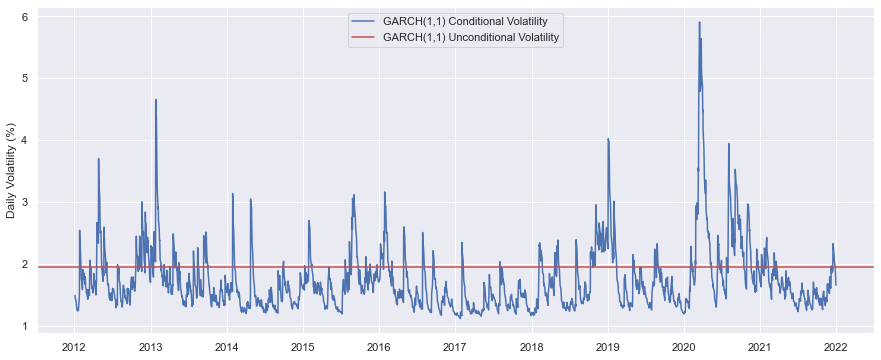

In [61]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(res_t.conditional_volatility , label='GARCH(1,1) Conditional Volatility')
ax.axhline(np.sqrt(uncond_var) , color='r', label='GARCH(1,1) Unconditional Volatility')

ax.set_ylabel('Daily Volatility (%)')
ax.legend(loc='upper center');

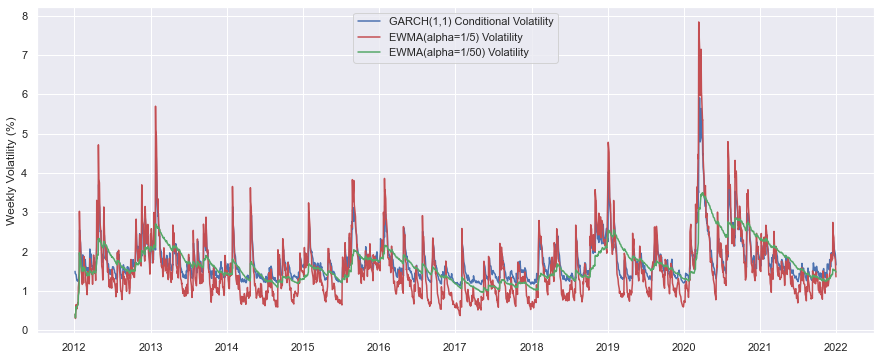

In [62]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(res_t.conditional_volatility , label='GARCH(1,1) Conditional Volatility')
ax.plot(x.ewm(alpha=1/5).std(), c='r', label='EWMA(alpha=1/5) Volatility')
ax.plot(x.ewm(alpha=1/50).std(), c='g', label='EWMA(alpha=1/50) Volatility')
ax.set_ylabel('Weekly Volatility (%)')
ax.legend(loc='upper center');


In [63]:
f = res_t.forecast(horizon=100)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [64]:
f.variance.iloc[-1]

h.001    2.507451
h.002    2.573752
h.003    2.636752
h.004    2.696615
h.005    2.753497
           ...   
h.096    3.828538
h.097    3.829056
h.098    3.829548
h.099    3.830016
h.100    3.830460
Name: 2021-12-31 00:00:00, Length: 100, dtype: float64

In [65]:
def garch_cond_vol_forecast(model_forecast):
    # retrieve frequency of data
    freq = model_forecast.variance.index.freq
    # retrieve forecast horizon
    horizon = model_forecast.variance.shape[1]
    
    # compute conditional volatility
    vol = np.sqrt(model_forecast.variance.iloc[-1].values)
    
    # generates the dates at which the forecasts are computed
    # the first date being the last date of the dataset is ignored
    d = pd.date_range(model_forecast.variance.index[-1], periods=horizon+1, freq=freq)[1:]
    
    return pd.Series(data=vol, index=d)
  

In [66]:
vol_forecast = garch_cond_vol_forecast(f)

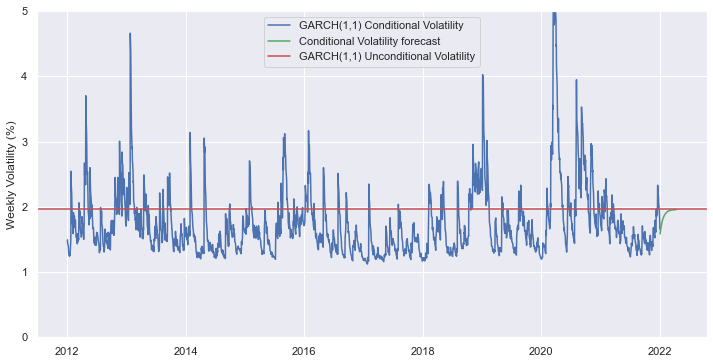

In [67]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(res_t.conditional_volatility, label='GARCH(1,1) Conditional Volatility')
ax.plot(vol_forecast, 'g', label='Conditional Volatility forecast')
ax.axhline(np.sqrt(uncond_var), color='r', label='GARCH(1,1) Unconditional Volatility')

ax.set_ylabel('Daily Volatility (%)')
ax.set_ylim([0, 5])
ax.legend(loc='upper center');